In [25]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv("datasets\zoo_data(Decision Tree Program).csv")

df.head()

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [26]:

# X = df.values[:,0:4]
# y = df.values[:,-1]

X = df.drop("1.7",axis=1)
y = df["1.7"].values


In [27]:

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

model = DecisionTreeClassifier(criterion="entropy")
model.fit(xtrain,ytrain)
pred_y = np.array(model.predict(xtest))

print("confusion_matrix:\n",confusion_matrix(ytest,pred_y))
print("accuracy_score\n",accuracy_score(ytest,pred_y))
print("classification_report\n",classification_report(ytest,pred_y))


confusion_matrix:
 [[8 0 0 0 0 0 0]
 [0 9 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 1]
 [0 0 0 0 0 0 3]]
accuracy_score
 0.9333333333333333
classification_report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.90      1.00      0.95         9
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy                           0.93        30
   macro avg       0.95      0.88      0.90        30
weighted avg       0.95      0.93      0.93        30



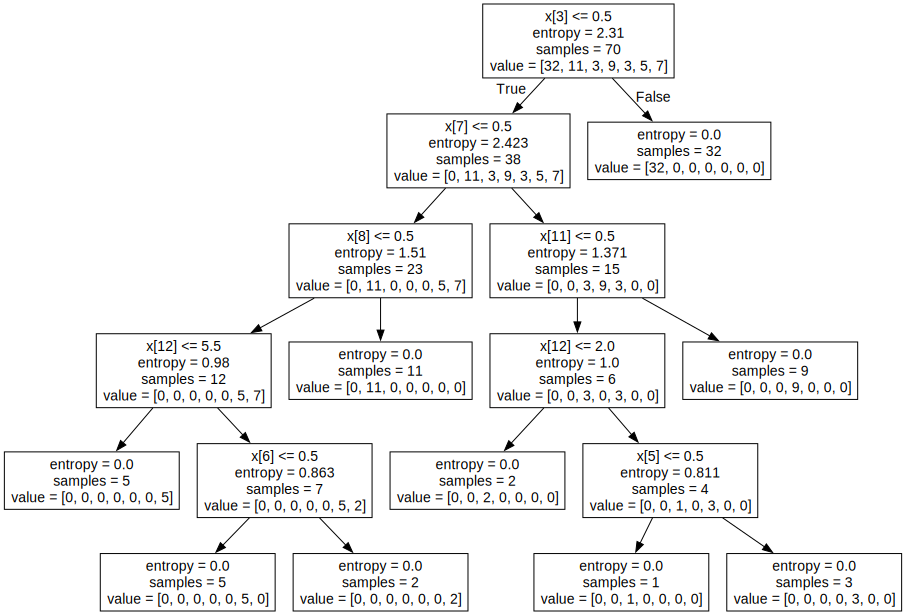

In [28]:
# Export the decision tree to a PNG image
from graphviz import Source
from sklearn import tree


dot_data = tree.export_graphviz(model)  
graph = Source(dot_data, format="png")
# graph.render("iris_decision_tree")
graph